In [40]:
import pandas as pd
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from math import exp
%matplotlib inline
sns.set()

In [41]:
data1 = pd.read_csv('ex2data1.txt', header = None, names = ['exam1', 'exam2', 'y'])
data1['ones'] = pd.Series(np.ones(100), dtype = int)
data1 = data1[['ones', 'exam1', 'exam2', 'y']]
X = np.array(data1.iloc[:, 0:3])
y = np.array(data1.iloc[:, 3:])

In [48]:
def plotData(data, label_x, label_y, label_pos, label_neg):
    # Get indexes for class 0 and class 1
    neg = data.iloc[:, 3] == 0
    pos = data.iloc[:, 3] == 1
    
    plt.axis([20, 110, 20, 110,])
    plt.scatter(data[pos].iloc[:, 1], data[pos].iloc[:, 2], marker = '+', c = 'k', s = 50, linewidth = 2, label = label_pos)
    plt.scatter(data[neg].iloc[:, 1], data[neg].iloc[:, 2], c = 'r', s = 50, label = label_neg)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.legend(frameon= False, fancybox = True);

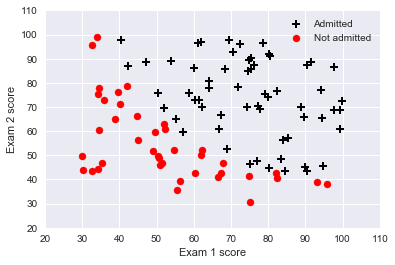

In [49]:
plotData(data1, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

In [7]:
def gFunction(z):
    try:
        return 1 / (1 + np.exp(-z))
    except ZeroDivisionError:
        return 0

In [8]:
def hFunction(theta, X):
    theta = np.array(theta).T
    h = np.array(gFunction(np.dot(X, theta)))
    return h

In [9]:
def costFunction(theta, X, y):
    m = y.size
    h = hFunction(theta, X)
    j = (-1 / m) * (np.dot((np.log(h)).T, y) + np.dot((np.log(1-h)).T, (1-y)))
    return j
    
costFunction([0, 0, 0], X, y)

array([ 0.69314718])

In [10]:
def gradientDescent(theta, X, y):
    m = y.size
    h = hFunction(theta, X).reshape(100, 1)
    gradient = (1 / m) * np.dot(X.T, (h - y))
    return gradient.flatten()

gradientDescent([0, 0, 0], X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [11]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradientDescent(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 [ 0.69314718]
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


In [12]:
def optimizer(costFunction, theta, X, y, gradientDescent):
    optimum = sc.optimize.minimize(costFunction, theta, args = (X, y), method = None, jac = gradientDescent, options={'maxiter' : 400})
    return optimum

optimizer(costFunction, initial_theta, X, y, gradientDescent)

c:\users\hamed\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


      fun: 0.2034977015894438
 hess_inv: array([[  3.31474479e+03,  -2.63892205e+01,  -2.70237122e+01],
       [ -2.63892205e+01,   2.23869433e-01,   2.02682332e-01],
       [ -2.70237122e+01,   2.02682332e-01,   2.35335117e-01]])
      jac: array([ -9.52476822e-09,  -9.31921318e-07,  -2.82608930e-07])
  message: 'Optimization terminated successfully.'
     nfev: 31
      nit: 23
     njev: 31
   status: 0
  success: True
        x: array([-25.16133284,   0.2062317 ,   0.2014716 ])

def predict(theta, exam1, exam2):
    x = np.array([1, exam1, exam2])
    predict = hFunction(optimum.x, x)
    print(1) if predict >= 0.5 else print(0)
    return predict

predict(optimum.x, 45, 85)

In [120]:
def predict(theta, X, threshold=0.5):
    p = gFunction(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

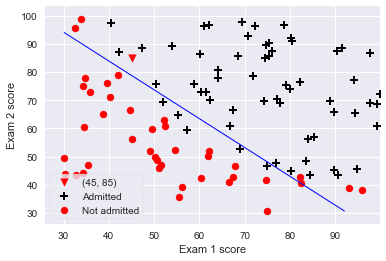

In [76]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data1, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = gFunction(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(optimum.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')

In [77]:
data2 = pd.read_csv('ex2data2.txt', header = None, names = ['Microchip Test 1', 'Microchip Test 2', 'y'])
y2 = np.array(data2.iloc[:, 2]).reshape(118, 1)
X2 = np.array(data2.iloc[:, 0:2])

In [78]:
def plotData2(data, label_x, label_y, label_pos, label_neg, axes = None):
    neg = data.iloc[:, 2] == 0
    pos = data.iloc[:, 2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos].iloc[:, 0], data[pos].iloc[:, 1], marker = '+', c = 'k', s = 50, linewidth = 2, label = label_pos)
    axes.scatter(data[neg].iloc[:, 0], data[neg].iloc[:, 1], c = 'r', s = 50, label = label_neg)
    plt.xlim = (-1, 1.5)
    plt.ylim = (-0.8, 1.2)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

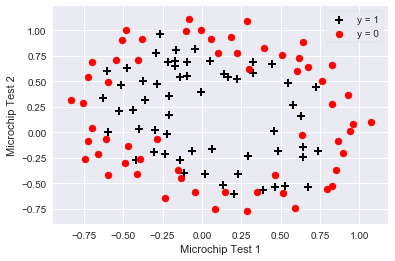

In [79]:
plotData2(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes = None)

In [80]:
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2.iloc[:, 0:2])
XX.shape

(118, 28)

In [122]:
def regularizedCostFunction(theta, X, y, λ = 1):
    m = y.size
    h = hFunction(theta, X).reshape(-1, 1)
    j = ((-1 / m) * (np.dot((np.log(h)).T, y) + np.dot((np.log(1-h)).T, (1-y)))) + (λ / (2 *  m)) * np.sum(np.square(theta[1:]))
    return j

In [123]:
def regularizedGradientDescent(theta, X, y, λ = 1):
    m = y.size
    h = hFunction(theta, X).reshape(118, 1)
    theta[0] = 0
    gradient = (1 / m) * np.dot(X.T, (h - y)) + (λ / m * theta).reshape(-1, 1)
    return gradient.flatten()

In [125]:
initial_theta2 = np.zeros(XX.shape[1])
#print(costFunctionReg(initial_theta2, XX, y2))
#print(gradientReg(initial_theta2, XX, y2))
print(sc.optimize.minimize(regularizedCostFunction, initial_theta2, args = (XX, y2), method = None, jac = regularizedGradientDescent, options = {'maxiter':3000}))

      fun: 0.5290027422869217
 hess_inv: array([[  1.07914459e+01,   1.00370134e+00,   1.21057597e+00,
         -8.74612304e+00,  -2.24476234e+00,  -1.30928770e+01,
          7.84297773e-01,  -1.64458964e+00,  -2.48377276e-01,
         -6.52804934e-01,  -4.71782992e+00,   2.58090129e+00,
         -4.03086221e+00,   1.03695104e-01,  -5.05427604e+00,
         -6.82360128e-02,  -2.45505444e-02,   8.83292432e-01,
         -1.68341536e+00,  -5.50856476e-01,   2.14265744e+00,
         -2.31021183e+00,   2.03047279e+00,  -1.59242276e+00,
          1.32651853e+00,  -1.98877507e+00,   2.80730511e-01,
          5.99591174e-01],
       [  1.00370134e+00,   1.28889754e+01,   4.31839874e+00,
         -6.95995281e+00,  -7.08201337e+00,  -3.92029220e-03,
          1.69141341e+00,   7.17737681e-01,   2.99492672e+00,
         -3.00897829e+00,  -3.78374906e+00,  -2.07471726e-01,
          9.68383482e-01,  -1.53929603e+00,  -7.57663155e-01,
         -5.27877013e-01,   5.65484974e-01,   1.54975987e+00,
  